In [1]:
import sys, os
module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)

# move directory
os.chdir("..")

In [2]:
import pandas as pd
data_orig = pd.read_pickle("./dataset/KSTAR_tokamak_rl_control_data_orig.pkl")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from src.configuration.sim_config import SimConfig

config = SimConfig()

In [4]:
TCI = ['\\ne_tci01', '\\ne_tci02', '\\ne_tci03', '\\ne_tci04', '\\ne_tci05']

In [5]:
data_orig[TCI].isna().sum()

\ne_tci01    0
\ne_tci02    0
\ne_tci03    0
\ne_tci04    0
\ne_tci05    0
dtype: int64

In [45]:
data_orig['\\ne_inter01'].isna().sum()

4838442

In [6]:
# shot information
print("# of shot: {}".format(len(data_orig.shot.unique())))

# of shot: 4376


In [7]:
data_orig.columns

Index(['time', '\q95', '\qmin', '\ipmhd', '\betap', '\betan', '\li', '\bcentr',
       '\kappa', '\tritop', '\tribot', '\rsurf', '\aminor', '\drsep', '\rxpt1',
       '\zxpt1', '\rxpt2', '\zxpt2', '\MLSLHOUT', '\EC1_PWR', '\EC2_PWR',
       '\EC3_PWR', '\EC4_PWR', '\EC5_PWR', '\ECSEC1TZRTN', '\ECSEC2TZRTN',
       '\ECSEC3TZRTN', '\ECSEC4TZRTN', '\ECSES5TZRTN', '\nb11_pnb',
       '\nb12_pnb', '\nb13_pnb', '\PCPF1U', '\PCPF2U', '\PCPF3U', '\PCPF3L',
       '\PCPF4U', '\PCPF4L', '\PCPF5U', '\PCPF5L', '\PCPF6U', '\PCPF6L',
       '\PCPF7U', '\ne_inter01', '\ne_tci01', '\ne_tci02', '\ne_tci03',
       '\ne_tci04', '\ne_tci05', '\BETAP_DLM03', '\DMF_DLM03', '\WTOT_DLM03',
       '\LV01', '\LV12', '\LV23', '\LV34', '\LV45', '\RC03', '\VCM03',
       '\RCPPU1', '\RCPPU2:FOO', '\RCPPU2B:FOO', '\RCPPL1', '\RCPPL2B:FOO',
       '\I_GFLOW_IN:FOO', '\D_GFLOW_IN:FOO', '\G_GFLOW_IN:FOO',
       '\G_NFLOW_IN:FOO', '\ax3_bolo02:FOO', 'shot'],
      dtype='object')

In [23]:
data_orig.isna().sum()[49:]

\BETAP_DLM03         61213
\DMF_DLM03           61213
\WTOT_DLM03          61213
\LV01                43054
\LV12                43054
\LV23                43054
\LV34                43054
\LV45                43054
\RC03                43054
\VCM03               43054
\RCPPU1              46750
\RCPPU2:FOO        4850132
\RCPPU2B:FOO         43054
\RCPPL1              46750
\RCPPL2B:FOO       2388699
\I_GFLOW_IN:FOO      43948
\D_GFLOW_IN:FOO      23836
\G_GFLOW_IN:FOO      43948
\G_NFLOW_IN:FOO    4850132
\ax3_bolo02:FOO      73349
shot                     0
dtype: int64

In [13]:
data_orig[config.EFIT].describe()

,\q95,\ipmhd,\kappa,\tritop,\tribot,\betap,\betan,\li,\bcentr,\rsurf,\aminor,\drsep,\rxpt1,\zxpt1,\rxpt2,\zxpt2
count,4.850132e+06,4.850132e+06,4.850132e+06,4.850132e+06,4.850132e+06,4.850132e+06,4.850132e+06,4.850132e+06,4.850132e+06,4.850132e+06,4.850132e+06,4.850132e+06,4.850132e+06,4.850132e+06,4.850132e+06,4.850132e+06
mean,5.874755e+00,-5.196460e+05,1.645795e+00,4.041566e-01,6.063837e-01,1.983316e+10,1.742715e+10,6.308341e+27,-1.993262e+00,1.848892e+00,4.781629e-01,7.588859e-02,-8.618656e-01,-2.787899e+00,-8.724780e-01,-1.276568e+00
std,2.124131e+01,1.126590e+05,1.776579e-01,2.033088e-01,2.722495e-01,1.574441e+13,1.383441e+13,inf,2.948516e-01,8.784771e-02,2.568744e-02,1.651467e-01,4.627453e+00,3.685656e+00,4.626145e+00,4.404183e+00
min,-2.091459e-01,-2.342878e+06,2.116553e-01,-7.047294e-01,-9.839617e-01,-6.508312e+03,-6.172885e+03,0.000000e+00,-3.484645e+00,1.389672e+00,1.927236e-01,-2.737803e+00,-9.990000e+00,-9.990000e+00,-9.990000e+00,-9.990000e+00
25%,4.258744e+00,-5.863224e+05,1.624468e+00,2.885922e-01,3.109979e-01,8.074105e-01,1.032416e+00,9.284203e-01,-1.816327e+00,1.755100e+00,4.507549e-01,-1.830570e-02,1.367320e+00,-9.319209e-01,1.350635e+00,8.062211e-01
50%,4.949462e+00,-5.119634e+05,1.717635e+00,3.609939e-01,7.560478e-01,1.333649e+00,1.618714e+00,1.047382e+00,-1.791801e+00,1.767611e+00,4.613917e-01,-1.169130e-02,1.387916e+00,-8.787218e-01,1.384056e+00,8.576671e-01
75%,5.553715e+00,-4.802110e+05,1.766661e+00,4.488949e-01,8.331774e-01,1.667965e+00,2.019622e+00,1.290273e+00,-1.791403e+00,1.777241e+00,4.720313e-01,2.090574e-02,1.408358e+00,-8.638797e-01,1.402845e+00,8.776155e-01
max,5.807896e+03,2.951586e+06,2.297786e+00,1.000000e+00,1.000000e+00,1.786450e+16,1.569731e+16,5.682168e+33,-1.392782e+00,1.965786e+00,7.264121e-01,5.307378e+00,2.151846e+00,8.890118e-02,2.227797e+00,1.305395e+00


In [8]:
data_orig[config.RC].describe()

,\RC03,\VCM03,\RCPPU1,\RCPPU2:FOO,\RCPPU2B:FOO,\RCPPL1,\RCPPL2B:FOO
count,4.807078e+06,4.807078e+06,4.803382e+06,0.0,4.807078e+06,4.803382e+06,2.461433e+06
mean,4.901729e+05,4.993071e+05,1.735798e+08,NaN,1.563619e-02,7.256055e+07,4.613763e-02
std,1.813538e+05,1.865106e+05,1.499720e+09,NaN,6.270677e-02,1.323687e+09,3.564380e-02
min,-7.900335e+05,-2.552792e+06,-1.071764e+10,NaN,-2.135315e+00,-1.099812e+10,-1.388397e+00
25%,4.653612e+05,4.848358e+05,-2.849903e+06,NaN,1.586987e-02,-3.259619e+06,3.890991e-02
50%,5.011450e+05,5.207273e+05,3.642392e+05,NaN,1.892090e-02,4.170249e+05,4.455131e-02
75%,5.976562e+05,6.128498e+05,7.098458e+06,NaN,2.365112e-02,2.363529e+06,5.081177e-02
max,1.210707e+06,2.517846e+06,3.201175e+10,NaN,6.407776e+00,3.225237e+10,9.686425e-01


In [14]:
data_orig[config.DL].describe()

,\BETAP_DLM03,\DMF_DLM03,\WTOT_DLM03
count,4.788919e+06,4.788919e+06,4.788919e+06
mean,-2.430152e+23,1.328156e+00,1.589506e+02
std,inf,4.517023e+00,1.391942e+02
min,-1.163780e+30,-1.902352e+02,-5.198911e+03
25%,4.094546e-01,-5.834498e-01,6.289467e+01
50%,8.256659e-01,8.484637e-01,1.662324e+02
75%,1.079853e+00,3.098298e+00,2.349034e+02
max,4.105490e+11,5.981235e+02,3.540965e+03


In [9]:
# x-points
data_orig[['\\rxpt1','\\zxpt1', '\\rxpt2', '\\zxpt2']]

,\rxpt1,\zxpt1,\rxpt2,\zxpt2
0,-9.99000,-9.990000,-9.990000,-9.990000
1,-9.99000,-9.990000,-9.990000,-9.990000
2,-9.99000,-9.990000,-9.990000,-9.990000
3,-9.99000,-9.990000,-9.990000,-9.990000
4,-9.99000,-9.990000,-9.990000,-9.990000
...,...,...,...,...
3269,1.44748,-0.820929,1.446377,0.823187
3270,1.44748,-0.820929,1.446377,0.823187
3271,1.44748,-0.820929,1.446377,0.823187
3272,1.44748,-0.820929,1.446377,0.823187


In [13]:
data_orig[['\LV01', '\LV12', '\LV23', '\LV34', '\LV45']].describe()

,\LV01,\LV12,\LV23,\LV34,\LV45
count,4.807078e+06,4.807078e+06,4.807078e+06,4.807078e+06,4.807078e+06
mean,-1.984918e-01,-1.396963e-01,-1.986790e-01,-1.508775e-01,-2.009051e-01
std,8.825858e-01,5.958062e-01,7.672595e-01,5.785843e-01,8.802263e-01
min,-2.535629e+01,-2.515544e+01,-4.467176e+01,-2.459746e+01,-2.528805e+01
25%,-2.599262e-01,-2.304044e-01,-2.695296e-01,-2.299371e-01,-2.666385e-01
50%,-1.731591e-02,-4.991961e-02,-4.581296e-02,-5.117077e-02,-1.909003e-02
75%,4.245045e-02,1.860173e-02,2.565879e-02,2.119762e-02,4.081813e-02
max,2.553983e+01,2.555499e+01,2.495003e+01,2.440578e+01,2.551093e+01


In [33]:
data_orig[data_orig['\\LV01'].isna() == True].shot.unique()

array([23076, 23396, 23404, 23413, 23416, 23417, 23422, 23700, 23701,
       23703, 27966, 28026, 28027, 28028, 28029, 28030, 28093, 28299,
       28305, 28308, 28309, 28310, 28311, 28312, 28313, 28314, 28315,
       28316, 28317, 28319, 28320, 28321, 28322, 28323, 28325, 28326,
       28327, 28329, 28330, 28331, 28658, 28711, 28728])

In [41]:
data_orig[data_orig['\\RC03'].isna() == True].shot.unique()

array([23076, 23396, 23404, 23413, 23416, 23417, 23422, 23700, 23701,
       23703, 27966, 28026, 28027, 28028, 28029, 28030, 28093, 28299,
       28305, 28308, 28309, 28310, 28311, 28312, 28313, 28314, 28315,
       28316, 28317, 28319, 28320, 28321, 28322, 28323, 28325, 28326,
       28327, 28329, 28330, 28331, 28658, 28711, 28728])

In [43]:
data_orig[data_orig['\\WTOT_DLM03'].isna() == True].shot.unique()

array([23076, 23396, 23404, 23413, 23416, 23417, 23422, 23516, 23518,
       23519, 23521, 23522, 23523, 23524, 23525, 23526, 23527, 23529,
       23532, 23700, 23701, 23703, 25507, 25508, 25509, 25511, 25513,
       27966, 28026, 28027, 28028, 28029, 28030, 28093, 28299, 28305,
       28308, 28309, 28310, 28311, 28312, 28313, 28314, 28315, 28316,
       28317, 28319, 28320, 28321, 28322, 28323, 28325, 28326, 28327,
       28329, 28330, 28331, 28658, 28711, 28728])

In [44]:
data_orig[data_orig['\\BETAP_DLM03'].isna() == True].shot.unique()

array([23076, 23396, 23404, 23413, 23416, 23417, 23422, 23516, 23518,
       23519, 23521, 23522, 23523, 23524, 23525, 23526, 23527, 23529,
       23532, 23700, 23701, 23703, 25507, 25508, 25509, 25511, 25513,
       27966, 28026, 28027, 28028, 28029, 28030, 28093, 28299, 28305,
       28308, 28309, 28310, 28311, 28312, 28313, 28314, 28315, 28316,
       28317, 28319, 28320, 28321, 28322, 28323, 28325, 28326, 28327,
       28329, 28330, 28331, 28658, 28711, 28728])

In [40]:
data_orig[data_orig['\\ax3_bolo02:FOO'].isna() == True].shot.unique()

array([23250, 23251, 23252, 23253, 23254, 23255, 23257, 23258, 23262,
       23263, 23264, 23265, 23266, 23267, 23269, 23272, 23273, 23274,
       23280, 23281, 23282, 23283, 23284, 23285, 23286, 23287, 23288,
       23290, 23292, 23293, 23295, 23296, 23297, 23298, 23299, 23300,
       23301, 23302, 23305, 23308, 23313, 23315, 23317, 23320, 23321,
       23322, 23324, 23325, 23326, 23332, 23334, 23336, 23337, 23338,
       23339, 23340, 23341, 23342, 23343, 23344, 23346, 23349, 23350,
       23351, 30002, 30732, 30736, 30737, 30739, 30741, 30743, 30745,
       30749, 30751, 30753, 30755, 30763, 30765, 30769, 30771, 30775,
       30781, 30785, 30793, 30799, 30801, 30805])

In [11]:
data_orig[['\\nb11_pnb','\\nb12_pnb', '\\nb13_pnb']].describe()

,\nb11_pnb,\nb12_pnb,\nb13_pnb
count,4.509523e+06,4.507386e+06,4.514879e+06
mean,8.469680e-01,1.101057e+00,3.719661e-01
std,6.427497e-01,6.970381e-01,4.797645e-01
min,-1.829195e+00,-3.465408e-02,-2.961715e-02
25%,2.879857e-04,3.768384e-03,-6.053949e-06
50%,1.162073e+00,1.419847e+00,6.304227e-05
75%,1.400656e+00,1.676567e+00,7.118555e-01
max,1.843979e+00,1.992009e+00,1.807618e+00


In [12]:
data_orig[['\EC1_PWR', '\EC2_PWR','\EC3_PWR', '\EC4_PWR', '\EC5_PWR']].describe()

,\EC1_PWR,\EC2_PWR,\EC3_PWR,\EC4_PWR,\EC5_PWR
count,0.0,1.635224e+06,2.302935e+06,1.178825e+06,875003.000000
mean,NaN,2.182105e+02,1.167387e+02,2.122113e+02,303.372375
std,NaN,2.895660e+02,2.082668e+02,3.052411e+02,317.074646
min,NaN,-7.257137e+00,-5.326783e+01,-2.441525e-02,-30.826748
25%,NaN,6.883931e-01,1.373055e+01,8.972442e+00,4.457228
50%,NaN,1.471720e+00,2.199859e+01,1.028352e+01,8.233935
75%,NaN,5.302627e+02,2.409077e+01,5.706962e+02,611.327698
max,NaN,8.502504e+02,1.048199e+03,1.068621e+03,1033.967285


In [24]:
data_orig[['\PCPF1U', '\PCPF2U', '\PCPF3U', '\PCPF3L','\PCPF4U', '\PCPF4L', '\PCPF5U', '\PCPF5L', '\PCPF6U', '\PCPF6L','\PCPF7U']].describe()

,\PCPF1U,\PCPF2U,\PCPF3U,\PCPF3L,\PCPF4U,\PCPF4L,\PCPF5U,\PCPF5L,\PCPF6U,\PCPF6L,\PCPF7U
count,4.850132e+06,4.850132e+06,4.850132e+06,4.850132e+06,4.850132e+06,4.850132e+06,4.850132e+06,4.850132e+06,4.850132e+06,4.850132e+06,4.850132e+06
mean,2.255109e+03,1.588653e+03,-4.792083e+03,-4.411101e+03,-6.038169e+03,-5.871821e+03,-2.855977e+03,-3.495037e+03,1.628975e+03,1.869167e+03,3.166933e+03
std,3.013432e+03,3.415818e+03,3.944146e+03,3.861808e+03,4.395464e+03,4.312313e+03,3.348935e+03,3.427678e+03,1.551047e+03,1.711955e+03,1.634960e+03
min,-5.081000e+03,-1.586350e+04,-1.550550e+04,-1.595650e+04,-1.530300e+04,-1.527699e+04,-9.802000e+03,-1.302849e+04,-8.535000e+03,-6.747500e+03,-1.623550e+04
25%,3.710000e+02,-5.939614e+02,-7.056000e+03,-6.861500e+03,-9.209000e+03,-9.088500e+03,-5.068500e+03,-5.776000e+03,7.785000e+02,9.250000e+02,2.121000e+03
50%,1.851500e+03,9.290000e+02,-5.631500e+03,-5.247500e+03,-7.121000e+03,-6.988500e+03,-3.719500e+03,-4.206000e+03,1.649005e+03,1.888500e+03,3.070500e+03
75%,3.708000e+03,3.165500e+03,-2.785500e+03,-2.427014e+03,-3.925000e+03,-3.808357e+03,-1.610971e+03,-2.142500e+03,2.581933e+03,2.911000e+03,4.002000e+03
max,1.513100e+04,1.600200e+04,1.502750e+04,1.790850e+04,1.564200e+04,1.572250e+04,1.503150e+04,1.502450e+04,1.004600e+04,1.004250e+04,1.005450e+04


In [25]:
# TCI
data_orig[['\\ne_tci01', '\\ne_tci02', '\\ne_tci03', '\\ne_tci04', '\\ne_tci05']].describe()

,\ne_tci01,\ne_tci02,\ne_tci03,\ne_tci04,\ne_tci05
count,4.850132e+06,4.850132e+06,4.850132e+06,4.850132e+06,4.850132e+06
mean,3.589867e+01,-4.511978e+02,5.502350e+01,6.572622e+01,9.255140e+01
std,5.522775e+03,2.580407e+04,8.405883e+03,1.048029e+04,1.610832e+04
min,-1.390375e+03,-2.403412e+06,-1.762977e+03,-2.206729e+03,-8.439353e+04
25%,1.327520e+00,1.592117e+00,1.427461e+00,1.128482e+00,5.016711e-01
50%,2.254315e+00,2.734015e+00,2.457619e+00,2.036623e+00,1.201458e+00
75%,2.857208e+00,3.520495e+00,3.179448e+00,2.718760e+00,1.959153e+00
max,1.285402e+06,1.692426e+06,1.956417e+06,2.439223e+06,3.744934e+06


In [28]:
data_orig[data_orig.shot == 30312][['\\ne_tci01', '\\ne_tci02', '\\ne_tci03', '\\ne_tci04', '\\ne_tci05']]

,\ne_tci01,\ne_tci02,\ne_tci03,\ne_tci04,\ne_tci05
0,0.957232,1.135519,0.802350,0.785973,0.644769
1,0.955408,1.141289,0.814945,0.813321,0.729474
2,0.944727,1.132552,0.811927,0.811418,0.776806
3,0.937287,1.109373,0.801902,0.799515,0.774172
4,0.927243,1.093454,0.795759,0.766700,0.757785
...,...,...,...,...,...
1219,0.472531,0.059245,-0.027318,-0.089175,-0.002803
1220,0.469999,0.063807,-0.031055,-0.074595,0.023715
1221,0.471354,0.061676,-0.045851,-0.075257,0.022795
1222,0.452871,0.038118,-0.076744,-0.092058,-0.037814


In [30]:
data_orig[data_orig.shot == 31888][['\\ne_tci01', '\\ne_tci02', '\\ne_tci03', '\\ne_tci04', '\\ne_tci05']].describe()

,\ne_tci01,\ne_tci02,\ne_tci03,\ne_tci04,\ne_tci05
count,849.000000,849.000000,849.000000,849.000000,849.000000
mean,1.901816,2.437126,2.229233,1.882751,1.558470
std,0.842779,1.107918,1.019163,0.854685,0.665965
min,-0.058973,-0.060243,0.000457,-0.025305,0.009594
25%,1.419414,1.891177,1.678615,1.387139,1.203794
50%,2.311448,2.926916,2.693320,2.306231,1.883663
75%,2.409350,3.131492,2.858167,2.451156,2.038241
max,2.889126,3.818544,3.592780,2.970200,2.373285


In [31]:
data_orig[data_orig.shot == 28158][['\\ne_tci01', '\\ne_tci02', '\\ne_tci03', '\\ne_tci04', '\\ne_tci05']].describe()

,\ne_tci01,\ne_tci02,\ne_tci03,\ne_tci04,\ne_tci05
count,870.000000,870.000000,870.000000,870.000000,870.000000
mean,2.020077,7.537583,68.648659,-56.728420,0.894431
std,0.900497,8.325562,180.327133,72.039742,0.688082
min,-0.047987,-4.714220,-3.401608,-160.985138,-0.659577
25%,1.481866,2.884227,2.342563,-135.248943,0.423109
50%,2.302213,3.291040,2.699826,1.773291,0.883236
75%,2.656297,12.325199,3.249156,2.361128,1.196681
max,3.156676,24.324060,573.109131,3.182985,2.641999


(0.0, 10.0)

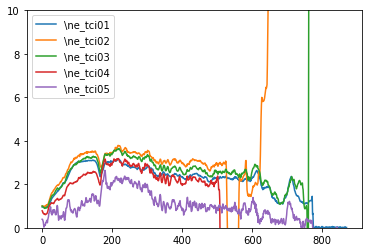

In [35]:
data_orig[data_orig.shot == 28158][['\\ne_tci01', '\\ne_tci02', '\\ne_tci03', '\\ne_tci04', '\\ne_tci05']].plot()
plt.ylim(0,10)

In [37]:
data_orig[['\ECSEC1TZRTN', '\ECSEC2TZRTN','\ECSEC3TZRTN', '\ECSEC4TZRTN', '\ECSES5TZRTN']].describe()

,\ECSEC1TZRTN,\ECSEC2TZRTN,\ECSEC3TZRTN,\ECSEC4TZRTN,\ECSES5TZRTN
count,1.890288e+06,3.320079e+06,3.320079e+06,3.320079e+06,0.0
mean,-3.571925e+01,1.393937e-01,-2.440958e+01,-8.646217e+00,NaN
std,7.158357e-01,3.960165e+01,2.835985e+01,1.904878e+01,NaN
min,-3.500000e+01,-1.806549e+03,-1.000852e+04,-9.150002e+01,NaN
25%,-3.500000e+01,-8.444958e+00,-3.500000e+01,-2.708170e+01,NaN
50%,-3.500000e+01,3.924027e+00,-3.500000e+01,-3.106383e-02,NaN
75%,-3.500000e+01,7.626630e+00,-2.197479e-01,4.091967e-01,NaN
max,-3.500000e+01,2.538645e+02,1.675296e+02,8.472957e+01,NaN


In [7]:
data = pd.read_pickle("./dataset/KSTAR_tokamak_rl_control_data.pkl")

In [12]:
data.shot.unique()

array([22385, 22398, 22420, ..., 31993, 31995, 31996])

<AxesSubplot:>

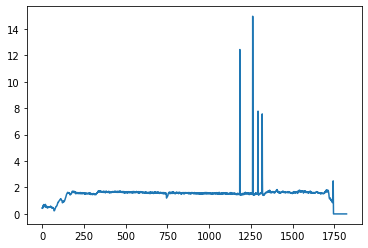

In [14]:
data[data.shot == 31993]['\\H89'].plot()

<AxesSubplot:>

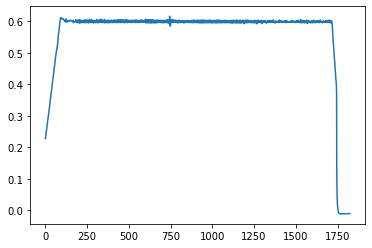

In [17]:
data[data.shot == 31993]['\\RC03'].plot()

In [21]:
def moving_avarage_smoothing(X:np.array,k:int, method = 'backward'):
    S = np.zeros(X.shape[0])
    
    if method == 'backward':
        for t in range(X.shape[0]):
            if t < k:
                S[t] = np.mean(X[:t+1])
            else:
                S[t] = np.sum(X[t-k:t])/k
    else:
        hw = k//2
        for t in range(X.shape[0]):
            if t < hw:
                S[t] = np.mean(X[:t+1])
            elif t  < X.shape[0] - hw:
                S[t] = np.mean(X[t-hw:t+hw])
            else:
                S[t] = np.mean(X[t-hw:])
    
    S = np.clip(S, 0, 1)
    
    return S

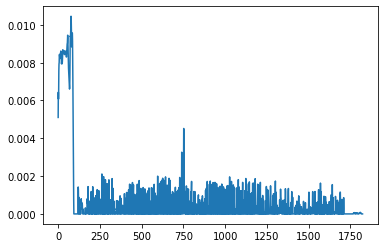

In [30]:
dvl = data[data.shot == 31993]['\\RC03'].shift(1).fillna(method = 'bfill').values.reshape(-1,)
dvr = data[data.shot == 31993]['\\RC03'].shift(-1).fillna(method = 'ffill').values.reshape(-1,)

import matplotlib.pyplot as plt

plt.plot(moving_avarage_smoothing(dvr-dvl, 8, 'center'))

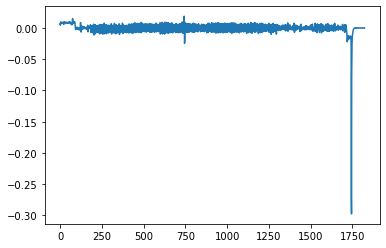

In [32]:
plt.plot(dvr-dvl)

<AxesSubplot:>

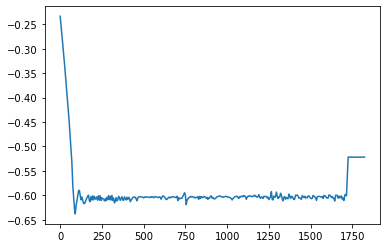

In [33]:
data[data.shot == 31993]['\\ipmhd'].plot()

<AxesSubplot:>

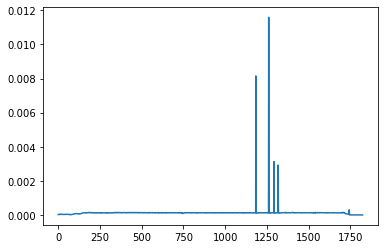

In [15]:
data[data.shot == 31993]['\\TAUE'].plot()

<AxesSubplot:>

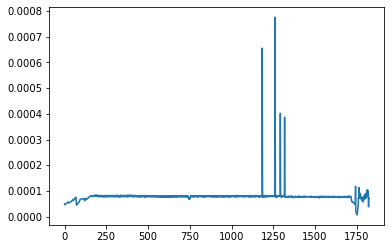

In [16]:
data[data.shot == 31993]['\\TAU89'].plot()